# Insolation Forest

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = 'data/01_bronze/2018.csv'
df = pd.read_csv(csv_file, sep=',',index_col=0)
df.shape

(7213446, 27)

# EDA

In [3]:
# Quitamos las rows sin valores registrados para DEP_DELAY
df_dep_delay = df[df['DEP_DELAY'].notna()]
df_dep_delay.shape

(7096212, 27)

In [4]:
# Visualizamos información del dataset y las primeras líneas del dataframe
print(df_dep_delay.info())
df_dep_delay.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7096212 entries, 2018-01-01 to 2018-12-31
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           object 
 1   OP_CARRIER_FL_NUM    int64  
 2   ORIGIN               object 
 3   DEST                 object 
 4   CRS_DEP_TIME         int64  
 5   DEP_TIME             float64
 6   DEP_DELAY            float64
 7   TAXI_OUT             float64
 8   WHEELS_OFF           float64
 9   WHEELS_ON            float64
 10  TAXI_IN              float64
 11  CRS_ARR_TIME         int64  
 12  ARR_TIME             float64
 13  ARR_DELAY            float64
 14  CANCELLED            float64
 15  CANCELLATION_CODE    object 
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  DISTANCE             float64
 21  CARRIER_DELAY        float64
 22  WEATHER_DELAY        float64
 23  NAS_DELAY            floa

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
FL_DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Calculamos el promedio de demora en la partida de los vuelos por origen y dia
df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])["DEP_DELAY"]\
    .mean()\
    .to_frame('MEAN_DEP_DELAY')\

df_mean_dep_delay

MEAN_DEP_DELAY
ORIGIN FL_DATE                   
ABE    2018-01-01        7.833333
       2018-01-02       77.375000
       2018-01-03       51.333333
       2018-01-04       30.125000
       2018-01-05       17.375000
...                           ...
YUM    2018-12-27        4.250000
       2018-12-28        2.250000
       2018-12-29        3.500000
       2018-12-30        3.750000
       2018-12-31       21.000000

[121465 rows x 1 columns]

In [6]:
# Para el análisis que sigue, seleccionamos el aeropuerto de New York
data = df_mean_dep_delay.loc['JFK',:]
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MEAN_DEP_DELAY  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB
None


,MEAN_DEP_DELAY
FL_DATE,
2018-01-01,18.311475
2018-01-02,18.047478
2018-01-03,10.893548
2018-01-04,71.066667
2018-01-05,154.356164


In [7]:
# Convertimos el índice a Datetime
data.index = pd.to_datetime(data.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MEAN_DEP_DELAY  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [8]:
# Actualizamos el dataset con la frecuencia que se infiere de los datos -  Freq: D -
data = data.asfreq(pd.infer_freq(data.index))
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MEAN_DEP_DELAY  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

<AxesSubplot:xlabel='FL_DATE'>

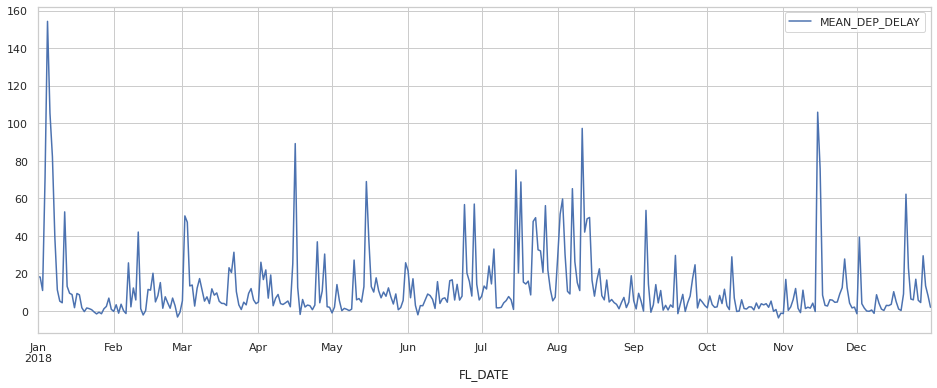

In [10]:
# Graficamos la serie temporal
plt.rc('figure',figsize=(16,6))
plt.rc('font',size=15)
data.plot()

In [20]:
# Establecemos el hiperparámetro del modelo outliers_fraction en un 12%
outliers_fraction = float(.012)

# Normalizamos los datos
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

In [19]:
# Entrenamos el modelo Isolation Forest
model = IsolationForest(contamination=outliers_fraction, random_state=42)
model.fit(data_scaled) 

IsolationForest(contamination=0.012, random_state=42)

In [13]:
# Hacemos las predicciones del modelo sobre el dataset
data_scaled['anomaly_scores'] = model.decision_function(data_scaled[['MEAN_DEP_DELAY']])
data_scaled['anomaly'] = model.predict(data_scaled[['MEAN_DEP_DELAY']])
data_scaled

,MEAN_DEP_DELAY,anomaly_scores,anomaly
0,0.310792,0.210499,1
1,0.296878,0.212469,1
2,-0.080190,0.262026,1
3,3.091402,0.053871,1
4,7.481406,-0.135725,-1
...,...,...,...
360,-0.418738,0.305281,1
361,0.895556,0.181401,1
362,0.049209,0.240937,1
363,-0.229320,0.285967,1


In [14]:
# Frecuencia de los valores normales y anómalos, segun los clasificó el modelo
data_scaled['anomaly'].value_counts()

 1    360
-1      5
Name: anomaly, dtype: int64

In [15]:
# Visualizamos el subset de datos detectados como anómalos por el modelo
data_scaled[data_scaled['anomaly']==-1]

,MEAN_DEP_DELAY,anomaly_scores,anomaly
4,7.481406,-0.135725,-1
5,4.900605,-0.039802,-1
105,4.047553,-0.006301,-1
222,4.474395,-0.027306,-1
318,4.929109,-0.044860,-1


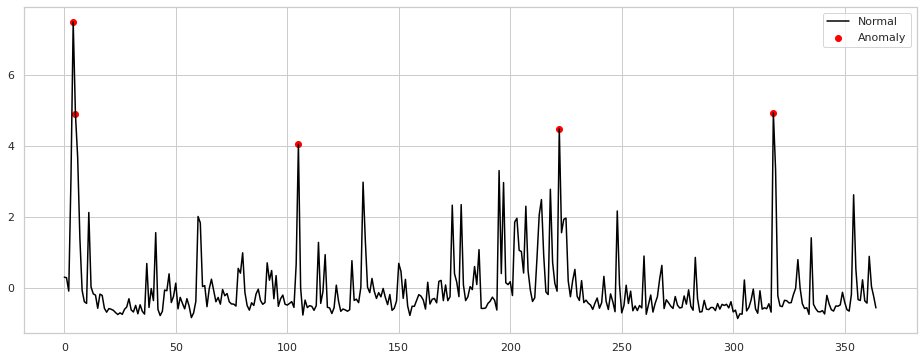

In [16]:
# visualization
fig, ax = plt.subplots(figsize=(16,6))

a = data_scaled.loc[data_scaled['anomaly'] == -1, ['MEAN_DEP_DELAY']] #anomaly

ax.plot(data_scaled.index, data_scaled['MEAN_DEP_DELAY'], color='black', label = 'Normal')
ax.scatter(a.index,a['MEAN_DEP_DELAY'], color='red', label = 'Anomaly')
plt.legend()
plt.show();